torch.Size([1, 128, 128, 384]) tensor(1.) tensor(0.)


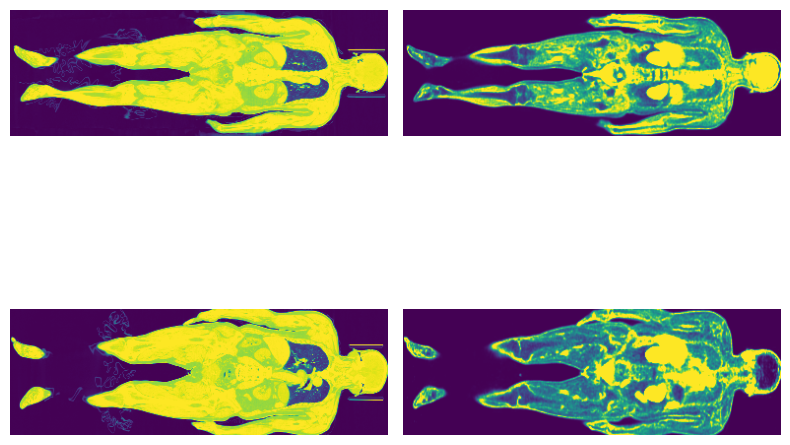

In [7]:


import h5py
import torch
import matplotlib.pyplot as plt


def plot_four_images(img1, img2, img3, img4, titles=None):
    """
    Plot four images in a 2x2 grid.

    Parameters:
    - img1, img2, img3, img4: array-like or PIL images to display.
    - titles: list of 4 strings (optional), titles for each subplot.
    """
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    images = [img1, img2, img3, img4]
    if titles is None:
        titles = ["", "", "", ""]
    
    for ax, img, title in zip(axs.flat, images, titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')  # Hide axes ticks
    
    plt.tight_layout()
    plt.show()


def load_h5(file_name: str):

    with h5py.File(file_name, 'r') as h5_file:

        fdg_ct = torch.from_numpy(h5_file['fdg_ct'][:])

        fdg_pt = torch.from_numpy(h5_file['fdg_pt'][:])

        psma_ct = torch.from_numpy(h5_file['psma_ct'][:])

        psma_pt = torch.from_numpy(h5_file['psma_pt'][:])

    

    return fdg_ct, fdg_pt, psma_ct, psma_pt


file = '/data/xiangcen/pet_gen/processed/batch1/邵耀明/data_h5.h5'

fdg_ct, fdg_pt, psma_ct, psma_pt = load_h5(file)

print(fdg_ct.shape, torch.max(fdg_ct), torch.min(fdg_ct))


# Usage:
idx = 80
# Usage:
plot_four_images(fdg_ct[0, idx, :, :], fdg_pt[0, idx, :, :], 
                 psma_ct[0, idx, :, :], psma_pt[0, idx, :, :])